In [1]:
import sys
sys.path.append('../')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
import pickle
import sys
from app.core import api

with open('../app/recording/data/master/sig1.pickle', 'rb') as f:
    sig1 = pickle.load(f)
    
with open('../app/recording/data/master/sig2.pickle', 'rb') as f:
    sig2 = pickle.load(f)
    
with open('../app/recording/data/master/offsets.pickle', 'rb') as f:
    offsets = pickle.load(f)
    
with open('../app/recording/data/master/angles.pickle', 'rb') as f:
    angles = pickle.load(f)    

In [4]:
%timeit api.calculate(sig1,sig2, offsets)

10.1 s ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


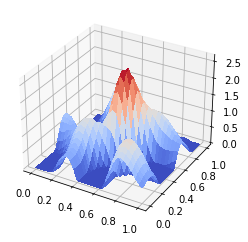

In [3]:
nx, ny = (31, 31)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
z = api.calculate(sig1,sig2, offsets)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv,yv,z,cmap=cm.coolwarm,linewidth=0, antialiased=False)

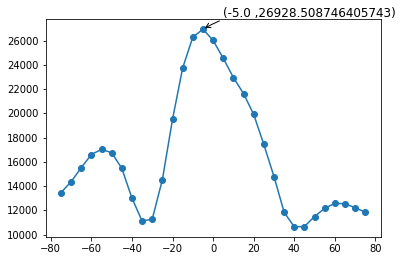

In [4]:
def calculate_rms(data):
    return np.array([np.sqrt(np.mean(direction**2)) for direction in data])

result = api.calculate_signals(offsets, sig1.T)
rms = calculate_rms(result)

posxmax = rms.argmax()
ymax = rms[posxmax]
xmax = angles[posxmax]

plt.annotate('('+str(xmax)+' ,'+str(ymax)+')',
             xy=(xmax, ymax),
             xytext=(xmax+10, ymax+1000), fontsize=12, xycoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#plt.ylim(top=11000)
plt.plot(angles, rms, marker='o')

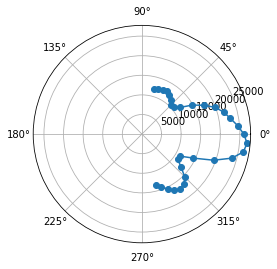

In [5]:
theta = [angle/180.0*np.pi for angle in angles]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, rms, marker='o')